In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)




Pearson correlation between Average Completion Rate and Happiness: r = 0.53, p-value = 1.95e-07


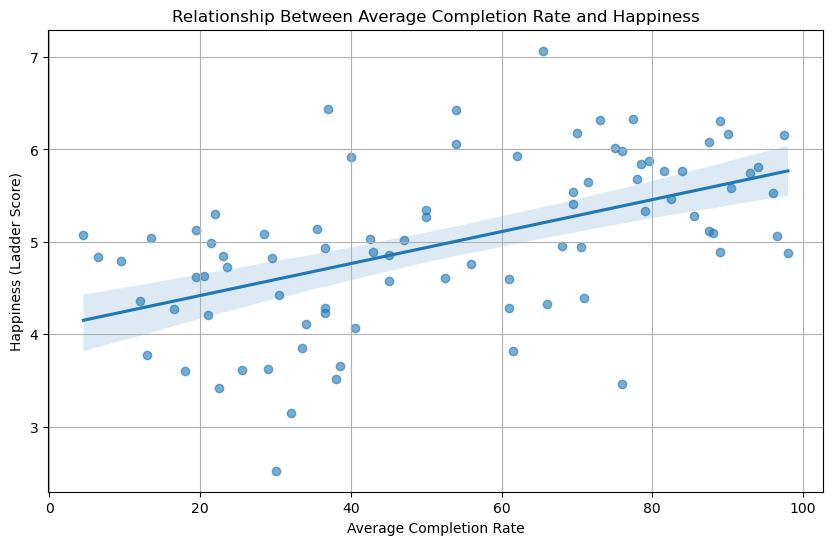

In [4]:
# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', scatter_kws={'alpha': 0.6})
plt.title('Relationship Between Average Completion Rate and Happiness')
plt.xlabel('Average Completion Rate')
plt.ylabel('Happiness (Ladder Score)')
plt.grid(True)

# Calculate Pearson correlation coefficient and p-value
r, p_value = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Completion Rate and Happiness: r = {r:.2f}, p-value = {p_value:.2e}')

plt.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_27100\861810119.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby('Group')['Ladder score'].mean().reset_index()


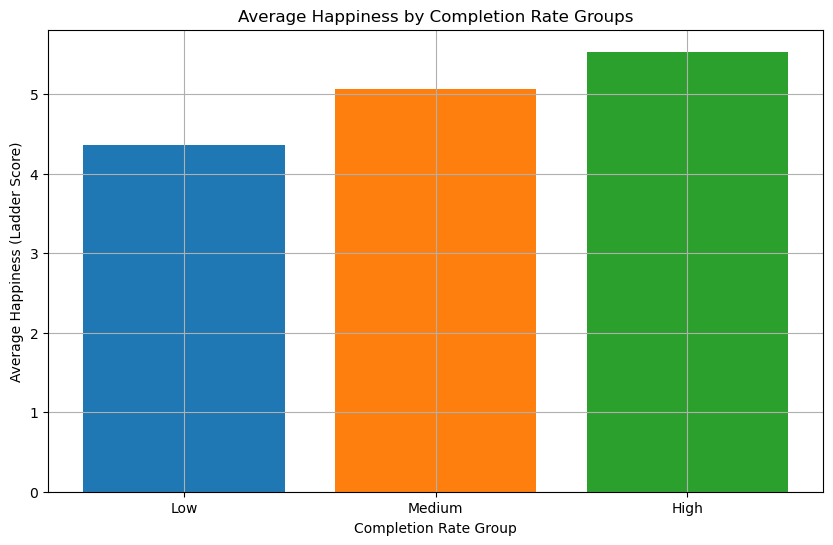

    Group  countries  avg_completion_rate  avg_happiness
0     Low         28            22.535714       4.366786
1  Medium         28            52.142857       5.061179
2    High         29            83.982759       5.536379
Bins: IntervalIndex([(-1, 27], (27, 55], (55, 84]], dtype='interval[int64, right]')
Group Size: 28


C:\Users\stanp\AppData\Local\Temp\ipykernel_27100\861810119.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_info = filtered_data.groupby('Group').agg(


In [5]:
# Split data into three evenly sized groups by increasing average completion rates
filtered_data = filtered_data.sort_values('Average_Completion_Rate').reset_index(drop=True)
group_size = len(filtered_data) // 3
groups = ['Low', 'Medium', 'High']
filtered_data['Group'] = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1], labels=groups)

# Calculate the average happiness for each group
grouped_data = filtered_data.groupby('Group')['Ladder score'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Group'], grouped_data['Ladder score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Happiness by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Average Happiness (Ladder Score)')
plt.grid(True)
plt.show()

# Calculate the group information
group_info = filtered_data.groupby('Group').agg(
    countries=('Country', 'count'),
    avg_completion_rate=('Average_Completion_Rate', 'mean'),
    avg_happiness=('Ladder score', 'mean')
).reset_index()

# Calculate the bin edges for each group
bins = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1])

# Display the group information
print(group_info)
print(f"Bins: {bins.categories}")
print(f"Group Size: {group_size}")

c:\Users\stanp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


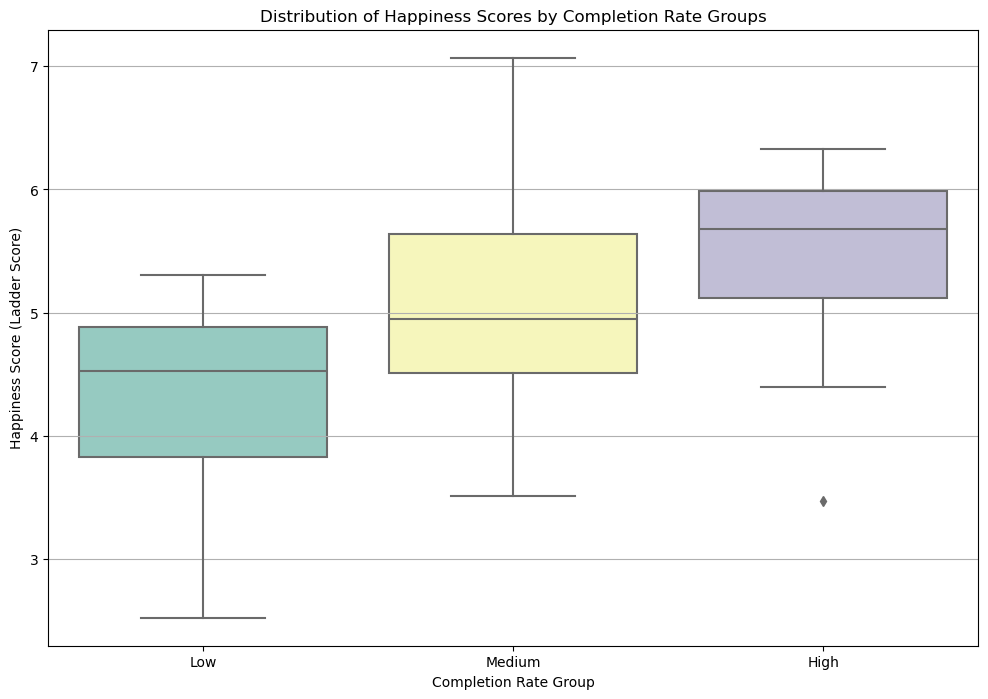

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the happiness scores by completion rate group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Ladder score', data=filtered_data, palette='Set3')
plt.title('Distribution of Happiness Scores by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Happiness Score (Ladder Score)')
plt.grid(axis='y')
plt.show()


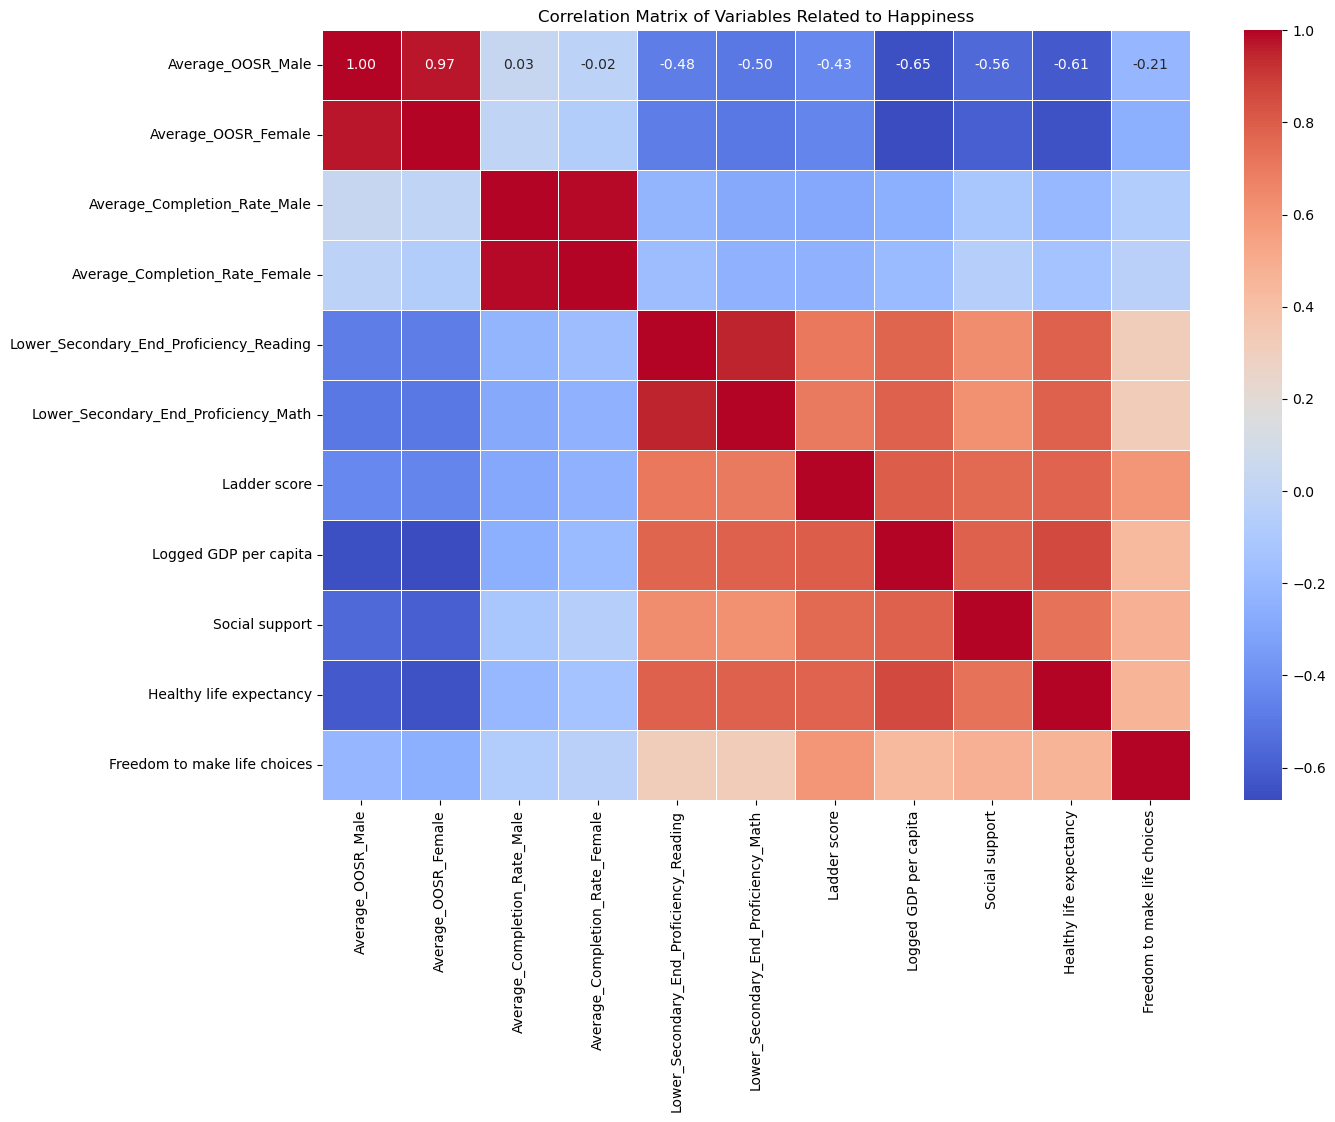

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Average_OOSR_Male', 'Average_OOSR_Female', 'Average_Completion_Rate_Male', 
                           'Average_Completion_Rate_Female', 'Lower_Secondary_End_Proficiency_Reading', 
                           'Lower_Secondary_End_Proficiency_Math', 'Ladder score', 'Logged GDP per capita', 
                           'Social support', 'Healthy life expectancy', 'Freedom to make life choices']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables Related to Happiness')
plt.show()


In [22]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'path_to_your_file.csv'
data = pd.read_csv(file_path)

# Create a world map plot of the ladder score per country
fig = px.choropleth(data_frame=data,
                    locations='Country',
                    locationmode='country names',
                    color='Ladder score',
                    color_continuous_scale='Viridis',
                    title='World Happiness Ladder Score by Country')

# Display the interactive plot
fig.show()

# Optional: Save the figure as an HTML file
fig.write_html("world_happiness_ladder_score.html")


In [43]:

# Create a world map plot of the ladder score per country
fig = px.choropleth(data_frame=data,
                    locations='Country',
                    locationmode='country names',
                    color='Ladder score',
                    color_continuous_scale='RdYlGn',
                    title='World Happiness Ladder Score by Country')

# Display the interactive plot
fig.show()

# Optional: Save the figure as an HTML file
fig.write_html("world_happiness_ladder_score.html")


In [44]:

# Calculate the average completion rate and filter out countries with zero values
data['Average_Completion_Rate'] = (data['Average_Completion_Rate_Male'] + data['Average_Completion_Rate_Female']) / 2
filtered_data = data[(data['Average_Completion_Rate_Male'] > 0) & (data['Average_Completion_Rate_Female'] > 0)]

# Create a world map plot of the average completion rate per country
fig = px.choropleth(data_frame=filtered_data,
                    locations='Country',
                    locationmode='country names',
                    color='Average_Completion_Rate',
                    color_continuous_scale='RdYlGn',
                    title='Average Completion Rate by Country')

# Display the interactive plot
fig.show()

# Optional: Save the figure as an HTML file
fig.write_html("average_completion_rate_world_map.html")


In [45]:


# Calculate the average OOSR (Out of School Rate) and filter out countries with zero values
data['Average_OOSR'] = (data['Average_OOSR_Male'] + data['Average_OOSR_Female']) / 2
filtered_oosr_data = data[(data['Average_OOSR_Male'] > 0) & (data['Average_OOSR_Female'] > 0)]

# Create a world map plot of the average OOSR per country
fig = px.choropleth(data_frame=filtered_oosr_data,
                    locations='Country',
                    locationmode='country names',
                    color='Average_OOSR',
                    color_continuous_scale='RdYlGn_r',
                    title='Average Out of School Rate (OOSR) by Country')

# Display the interactive plot
fig.show()

# Optional: Save the figure as an HTML file
fig.write_html("average_oosr_world_map.html")


In [49]:

# Filter out countries with zero values for Lower_Secondary_End_Proficiency_Reading
filtered_reading_data = data[data['Lower_Secondary_End_Proficiency_Reading'] > 0]

# Create a world map plot for Lower_Secondary_End_Proficiency_Reading
fig = px.choropleth(data_frame=filtered_reading_data,
                    locations='Country',
                    locationmode='country names',
                    color='Lower_Secondary_End_Proficiency_Reading',
                    color_continuous_scale='RdYlGn',
                    title='Lower Secondary End Proficiency in Reading by Country')

# Display the interactive plot
fig.show()




In [50]:

# Filter out countries with zero values for Lower_Secondary_End_Proficiency_Math
filtered_math_data = data[data['Lower_Secondary_End_Proficiency_Math'] > 0]

# Create a world map plot for Lower_Secondary_End_Proficiency_Math
fig = px.choropleth(data_frame=filtered_math_data,
                    locations='Country',
                    locationmode='country names',
                    color='Lower_Secondary_End_Proficiency_Math',
                    color_continuous_scale='RdYlGn',
                    title='Lower Secondary End Proficiency in Math by Country')

# Display the interactive plot
fig.show()



All plot's combined

In [55]:
import pandas as pd
import plotly.graph_objects as go



# Calculate additional columns needed
data['Average_Completion_Rate'] = (data['Average_Completion_Rate_Male'] + data['Average_Completion_Rate_Female']) / 2
data['Average_OOSR'] = (data['Average_OOSR_Male'] + data['Average_OOSR_Female']) / 2

# Create a combined world map plot with a dropdown menu for different variables
fig = go.Figure()

# Add traces for each variable
# Ladder score plot
fig.add_trace(go.Choropleth(
    locations=data['Country'],
    locationmode='country names',
    z=data['Ladder score'],
    colorscale='RdYlGn',
    colorbar_title='Ladder score',
    visible=True
))

# Average Completion Rate plot
fig.add_trace(go.Choropleth(
    locations=data[data['Average_Completion_Rate'] > 0]['Country'],
    locationmode='country names',
    z=data[data['Average_Completion_Rate'] > 0]['Average_Completion_Rate'],
    colorscale='RdYlGn',
    colorbar_title='Average Completion Rate',
    visible=False
))

# Average OOSR plot
fig.add_trace(go.Choropleth(
    locations=data[data['Average_OOSR'] > 0]['Country'],
    locationmode='country names',
    z=data[data['Average_OOSR'] > 0]['Average_OOSR'],
    colorscale='RdYlGn_r',
    colorbar_title='Average OOSR',
    visible=False
))

# Lower Secondary End Proficiency in Reading plot
fig.add_trace(go.Choropleth(
    locations=data[data['Lower_Secondary_End_Proficiency_Reading'] > 0]['Country'],
    locationmode='country names',
    z=data[data['Lower_Secondary_End_Proficiency_Reading'] > 0]['Lower_Secondary_End_Proficiency_Reading'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Reading',
    visible=False
))

# Lower Secondary End Proficiency in Math plot
fig.add_trace(go.Choropleth(
    locations=data[data['Lower_Secondary_End_Proficiency_Math'] > 0]['Country'],
    locationmode='country names',
    z=data[data['Lower_Secondary_End_Proficiency_Math'] > 0]['Lower_Secondary_End_Proficiency_Math'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Math',
    visible=False
))

# Create dropdown
dropdown_buttons = [
    {'label': 'Ladder score', 'method': 'update', 'args': [{'visible': [True, False, False, False, False]}, {'title': 'World Happiness Ladder Score by Country'}]},
    {'label': 'Average Completion Rate', 'method': 'update', 'args': [{'visible': [False, True, False, False, False]}, {'title': 'Average Completion Rate by Country'}]},
    {'label': 'Average OOSR', 'method': 'update', 'args': [{'visible': [False, False, True, False, False]}, {'title': 'Average Out of School Rate (OOSR) by Country'}]},
    {'label': 'Proficiency in Reading', 'method': 'update', 'args': [{'visible': [False, False, False, True, False]}, {'title': 'Lower Secondary End Proficiency in Reading by Country'}]},
    {'label': 'Proficiency in Math', 'method': 'update', 'args': [{'visible': [False, False, False, False, True]}, {'title': 'Lower Secondary End Proficiency in Math by Country'}]},
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title_text='World Maps with Dropdown'
)

# Display the interactive plot
fig.show()

# Optional: Save the figure as an HTML file
fig.write_html("combined_world_maps.html")
